# Visibility Graph Method

In [ ]:
!pip install ts2vg

In [ ]:
!pip install igraph

In [ ]:
!pip install pycairo
!pip install cairocffi

In [ ]:
import seaborn as sns
ts = [1.0, 0.5, 0.3, 0.7, 1.0, 0.5, 0.3, 0.8]
sns.lineplot(x=range(1, len(ts)+1), y=ts)

# Natural Visibility Graph
Two arbitrary data values $\left(t_{a}, y_{a}\right)$ and $\left(t_{b}, y_{b}\right)$ will have visibility, and consequently will become two connected nodes of the associated graph, if any other data $\left(t_{c}, y_{c}\right)$ placed between them fulfills:
$$
y_{c}<y_{b}+\left(y_{a}-y_{b}\right) \frac{t_{b}-t_{c}}{t_{b}-t_{a}} \text {. }
$$

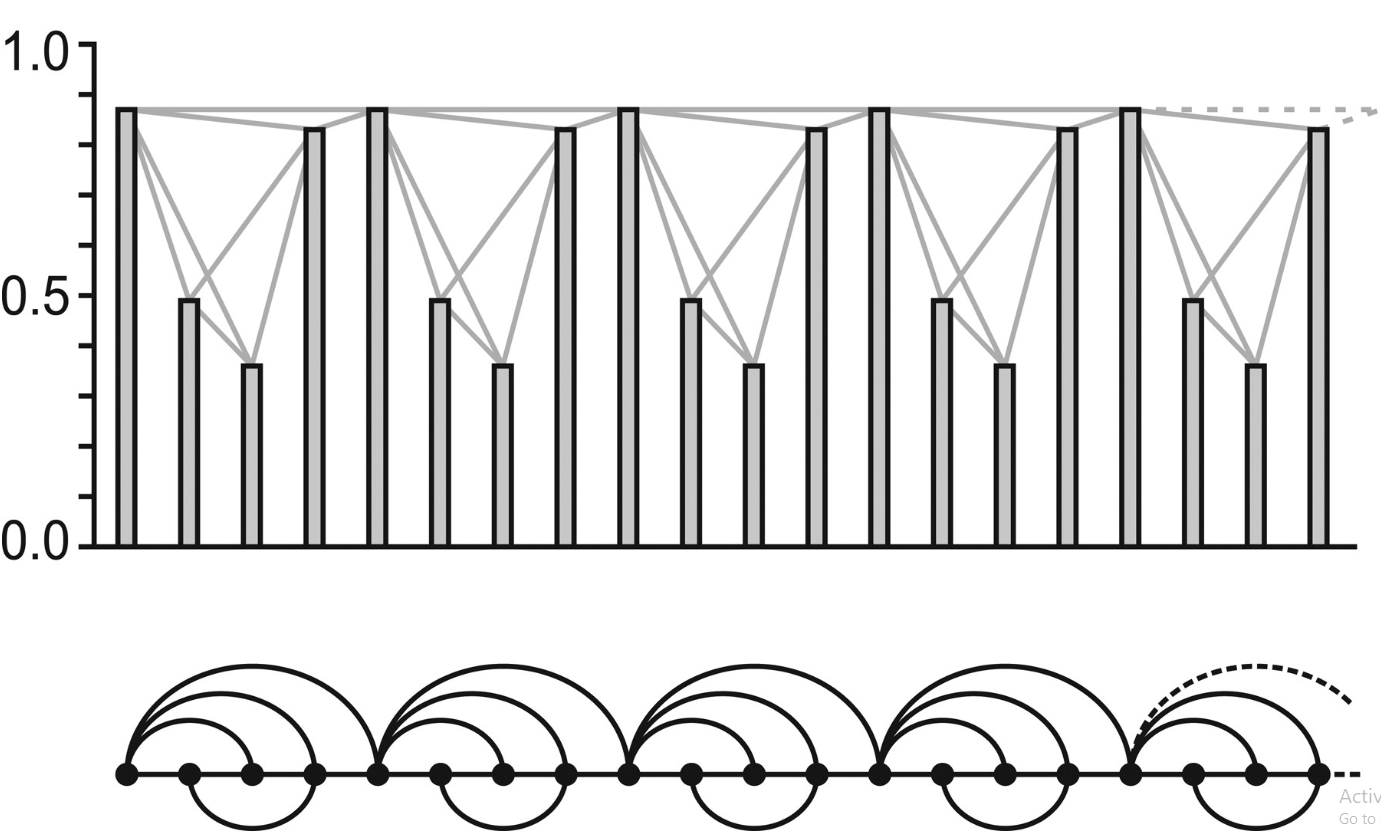

In [ ]:
from ts2vg import NaturalVG
import numpy as np
g = NaturalVG()
g.build(ts)
ig_g = g.as_igraph()

In [ ]:
print(ig_g)

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())


In [ ]:
nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

# Horizontal Visibility Graph
The horizontal visibility algorithm maps time series into graphs and it is defined as follows. Let $\left\{x_{i}\right\}_{i=1 . . N}$ be a time series of $N$ data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph from now on). Two nodes $i$ and $j$ in the graph are connected if one can draw a horizontal line in the time series joining $x_{i}$ and $x_{j}$ that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, $i$ and $j$ are two connected nodes if the following geometrical criterion is fulfilled within the time series:
$x_{i}, x_{j}>x_{n}$ for all $n$ such that $i<n<j$ 


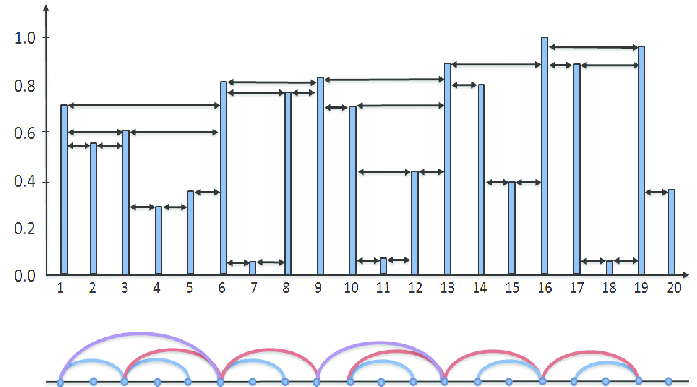

In [ ]:
from ts2vg import HorizontalVG
ts = [1.0, 0.5, 0.3, 0.7, 1.0, 0.5, 0.3, 0.8]
g = HorizontalVG()
g.build(ts)
ig_g = g.as_igraph()

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())


# Real World Example

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acc_walking_chest.csv to acc_walking_chest.csv


In [ ]:
import pandas as pd
walking = pd.read_csv('acc_walking_chest.csv')
standing = pd.read_csv('acc_standing_chest.csv')

In [ ]:
walking

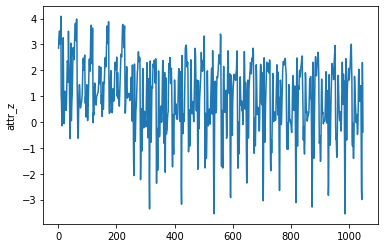

In [ ]:
sns.lineplot(x=range(1, len(walking['attr_x'][1000:2048])+1), y=walking['attr_x'][1000:2048])

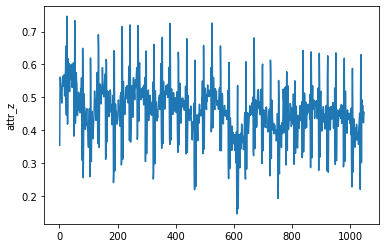

In [ ]:
sns.lineplot(x=range(1, len(standing['attr_x'][1000:2048])+1), y=standing['attr_x'][1000:2048])

In [ ]:
from ts2vg import HorizontalVG
g = HorizontalVG()
g.build(walking['attr_x'][1000:2048])
ig_g = g.as_igraph()

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1048
Number of Links: 2077
Average Degree: 3.963740458015267
Network Diameter: 23
Average Path Length: 10.597437607996675


In [ ]:
from ts2vg import HorizontalVG
g = HorizontalVG()
g.build(standing['attr_x'][1000:2048])
ig_g = g.as_igraph()

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1048
Number of Links: 2066
Average Degree: 3.9427480916030535
Network Diameter: 23
Average Path Length: 9.010081512427364
